<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>

# Análisis de Nvidia #

<br>
<br>

* * *

Abdon Islas <br>
Fecha: 4 de septiembre 2024 <br>

* * *

<br>
<br>

## Índice

- Introducción, objetivo y definición del problema
- Preparación de datos
  - Importar
  - Formato correcto (pandas series, fecha, valores numéricos)
  - Datos de entrenamiento y prueba
- Análisis Exploratorio
  - Visualizaciones
  - Características y estadísticas
  - Descomposición
- Modelo Seasonal Naive
  - Estimación
  - Evaluación

## Introducción, objetivo y definición del problema

## Descripción de las acciones de Nvidia

Descripción de las Acciones de Nvidia
Nvidia Corporation es una empresa tecnológica multinacional estadounidense que diseña tarjetas graficas para los mercados de juegos y profesionales, así como chips para el mercado de la computación móvil y la industria automotriz. Las acciones de Nvidia (NVDA) se cotizan en el mercado NASDAQ y son parte del índice NASDAQ y S&P 500.
Las acciones de Nvidia han experimentado un crecimiento significativo en los últimos años, impulsado por:

El auge de la inteligencia artificial y el aprendizaje profundo
La creciente demanda de tarjetas gráficas para juegos y criptomonería
La expansión en mercados emergentes como los vehículos autónomos y los centros de datos

En 2023, Nvidia se convirtió en la primera empresa de semiconductores en alcanzar una capitalización de mercado de un billón de dólares, uniéndose a un selecto grupo de gigantes tecnológicos.

##Importancia del Análisis y Pronóstico en el Contexto Financiero y Tecnológico

Analizar y pronosticar las acciones de Nvidia es crucial por varias razones:

.-Indicador del sector tecnológico: Nvidia es considerada un barómetro del sector tecnológico, especialmente en áreas de rápido crecimiento como la IA y la computación de alto rendimiento.

.-Impacto en índices bursátiles: Como componente importante de índices como el NASDAQ-100 y S&P 500, los movimientos de Nvidia pueden influir significativamente en el mercado general.

.-Tendencias de inversión: El rendimiento de Nvidia puede indicar tendencias más amplias en inversión tecnológica y confianza del mercado en sectores de vanguardia.

.-Evaluación de estrategias corporativas: El análisis de las acciones puede proporcionar información sobre la eficacia de las estrategias de Nvidia y su posición en el mercado.

.-Implicaciones económicas más amplias: El desempeño de Nvidia puede reflejar y afectar tendencias económicas más amplias, como la adopción de tecnologías emergentes y cambios en los patrones de gasto de consumidores y empresas.

## Definición del Pronóstico

Se analizará el precio de cierre diario de las acciones de Nvidia durante un período específico (por ejemplo, los últimos 5 años). Este análisis buscará identificar patrones, tendencias y posibles factores que influyen en el precio de las acciones.

## Relevancia del Análisis

El análisis de series temporales de las acciones de Nvidia es relevante por:

.-Toma de decisiones de inversión: Ayuda a inversores y gestores de fondos a tomar decisiones informadas.

.-Comprensión de la volatilidad del mercado: Proporciona información sobre la estabilidad y los riesgos del sector tecnológico.

.-Evaluación del impacto de eventos externos: Permite analizar cómo eventos globales (como la pandemia de COVID-19 o las tensiones comerciales) afectan a empresas tecnológicas líderes.

.-Predicción de tendencias tecnológicas: El rendimiento de Nvidia puede ser indicativo de la adopción y el éxito de tecnologías emergentes.

.-Análisis comparativo: Ofrece un punto de referencia para evaluar el rendimiento de otras empresas tecnológicas y de semiconductores.

Este análisis no solo es valioso para inversores y analistas financieros, sino también para economistas, planificadores estratégicos y responsables políticos interesados en las tendencias tecnológicas y su impacto económico.

## Datos

Banco de México registra las remesas como parte de la balanza de pagos y tiene registro mensual desde 1995.

Los datos de Banxico pueden ser descargados en el siguiente [enlace](https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?accion=consultarCuadro&idCuadro=CE81&locale=esc)

### Importar

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from statsmodels.tsa.seasonal import STL

In [2]:
stock = "NVDA"
ticker = yf.Ticker(stock)
data = ticker.history(start = "2013-01-01", end = "2023-12-31", interval = "1mo")["Close"]

### Formato Correcto

In [3]:
data.index = pd.to_datetime(data.index)

data = pd.Series(data = data.values, index=data.index)

In [4]:
type(data)

pandas.core.series.Series

In [5]:
data.index

DatetimeIndex(['2013-01-01 00:00:00-05:00', '2013-02-01 00:00:00-05:00',
               '2013-03-01 00:00:00-05:00', '2013-04-01 00:00:00-04:00',
               '2013-05-01 00:00:00-04:00', '2013-06-01 00:00:00-04:00',
               '2013-07-01 00:00:00-04:00', '2013-08-01 00:00:00-04:00',
               '2013-09-01 00:00:00-04:00', '2013-10-01 00:00:00-04:00',
               ...
               '2023-03-01 00:00:00-05:00', '2023-04-01 00:00:00-04:00',
               '2023-05-01 00:00:00-04:00', '2023-06-01 00:00:00-04:00',
               '2023-07-01 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-09-01 00:00:00-04:00', '2023-10-01 00:00:00-04:00',
               '2023-11-01 00:00:00-04:00', '2023-12-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=132, freq=None)

In [6]:
data.head()

,0
Date,
2013-01-01 00:00:00-05:00,0.282944
2013-02-01 00:00:00-05:00,0.292175
2013-03-01 00:00:00-05:00,0.297915
2013-04-01 00:00:00-04:00,0.319742
2013-05-01 00:00:00-04:00,0.335996


### Entrenamiento y prueba

Dependiendo de la cantidad de datos y la periodicidad podrías definir diferente cantidad de observaciones. La regla de pulgar es usar 80% de los datos para entrenar y el restante 20% para validar los resultados.

Para esta serie de tiempo 6 meses de validación son suficientes.

In [7]:
train_end = data.index[-7]  # 6 meses antes del final para validación
train_data = data[:train_end]
test_data = data[train_end:]

## Análisis Exploratorio

### Visualizaciones

Text(0.5, 1.0, 'Nvidia')

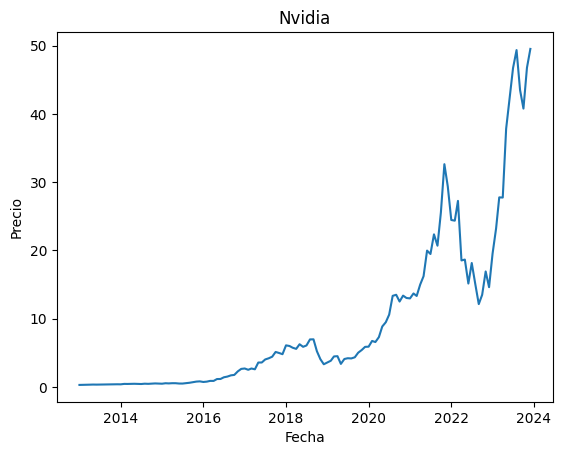

In [9]:
sns.lineplot(data = data)
plt.ylabel("Precio")
plt.xlabel("Fecha")
plt.title("Nvidia")

### Descomposición

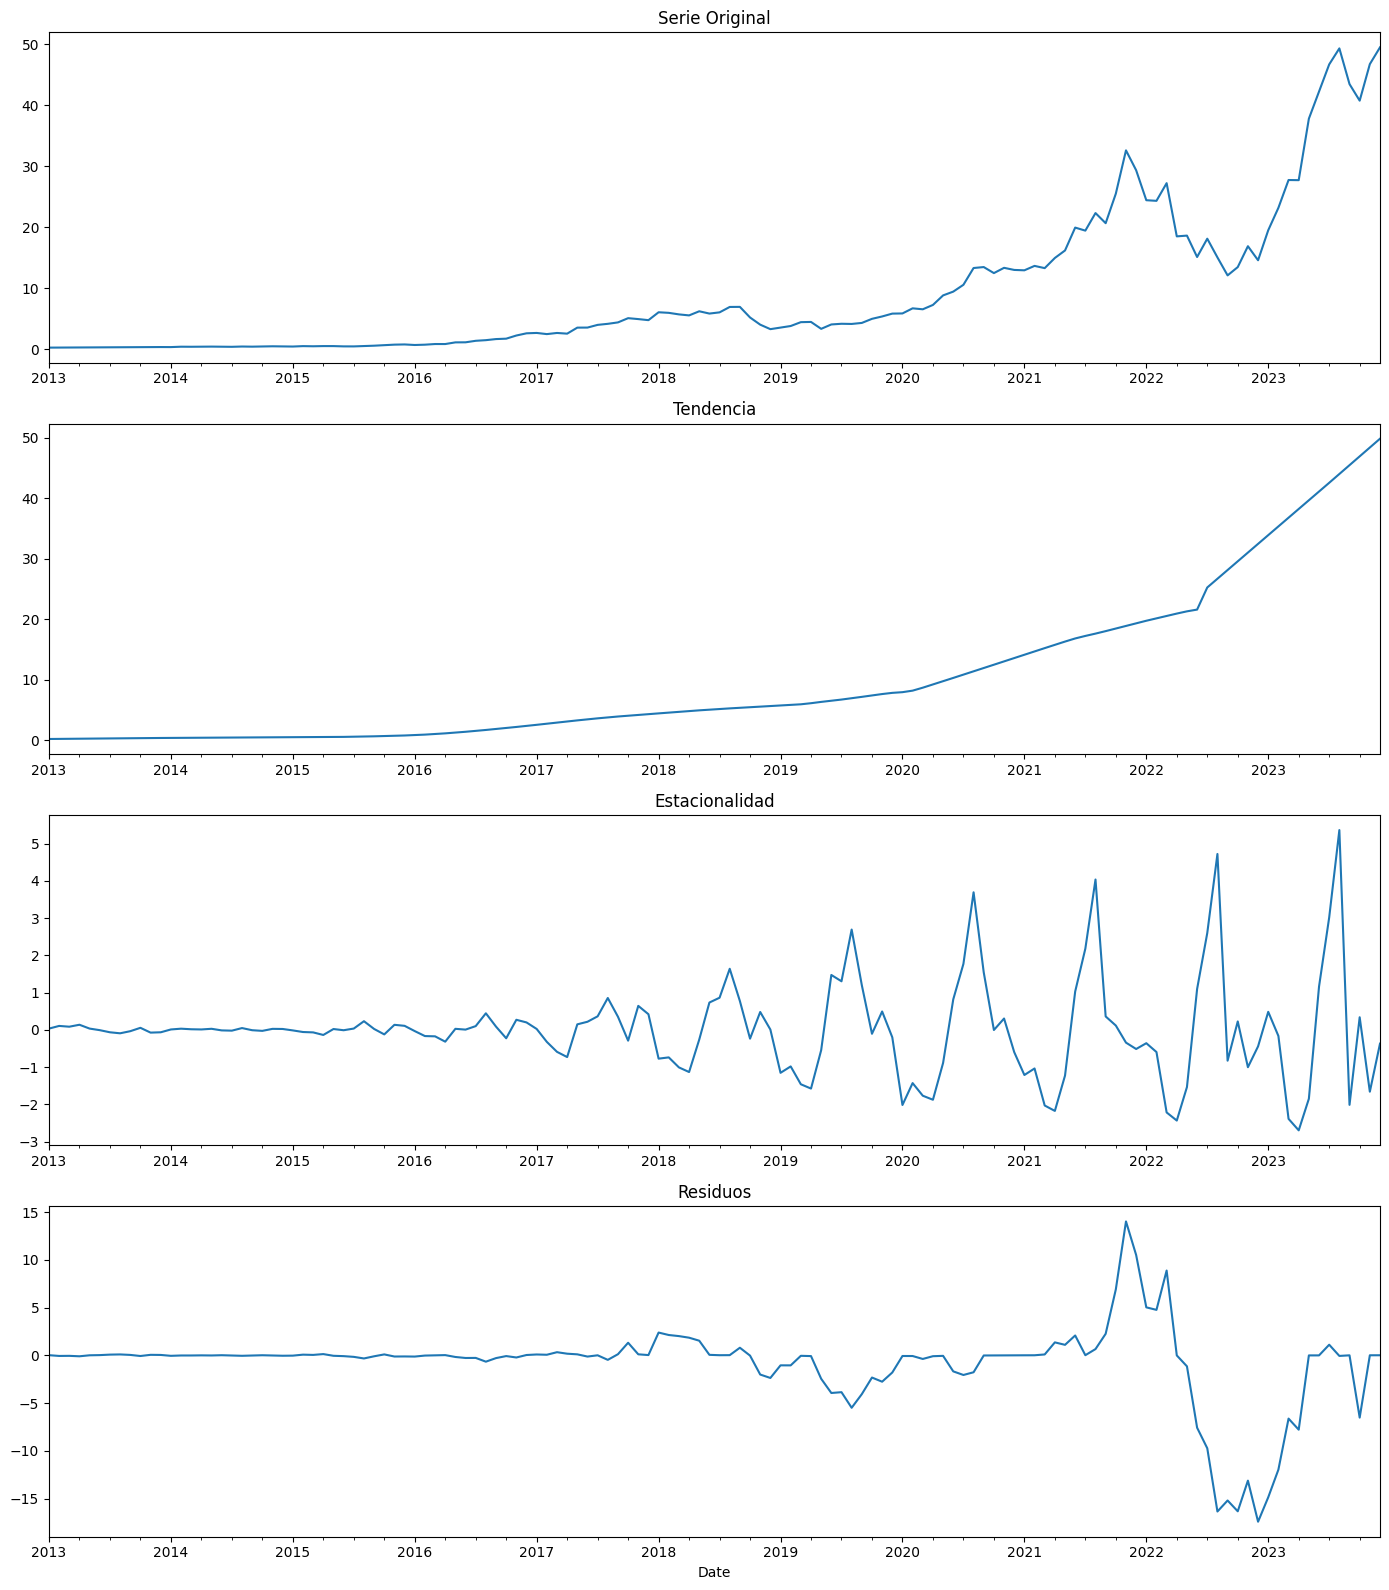

In [12]:
stl = STL(data, period=12, robust=True)
result = stl.fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 16))

data.plot(ax=ax1)
ax1.set_title('Serie Original')
ax1.set_xlabel('')


result.trend.plot(ax=ax2)
ax2.set_title('Tendencia')
ax2.set_xlabel('')


result.seasonal.plot(ax=ax3)
ax3.set_title('Estacionalidad')
ax3.set_xlabel('')

result.resid.plot(ax=ax4)
ax4.set_title('Residuos')

plt.tight_layout()
plt.show()


### Características y estadísticas

Estadísticas  de los componentes:

Tendencia:
count    132.000000
mean      10.218957
std       12.681493
min        0.223770
25%        0.694974
50%        5.125034
75%       15.380179
max       49.863392
Name: trend, dtype: float64

Estacionalidad:
count    132.000000
mean       0.005865
std        1.265938
min       -2.693639
25%       -0.518706
50%       -0.003070
75%        0.281953
max        5.364608
Name: season, dtype: float64

Residuos:
count    132.000000
mean      -0.871475
std        4.322807
min      -17.425635
25%       -0.273672
50%       -0.008842
75%        0.058645
max       14.036993
Name: resid, dtype: float64


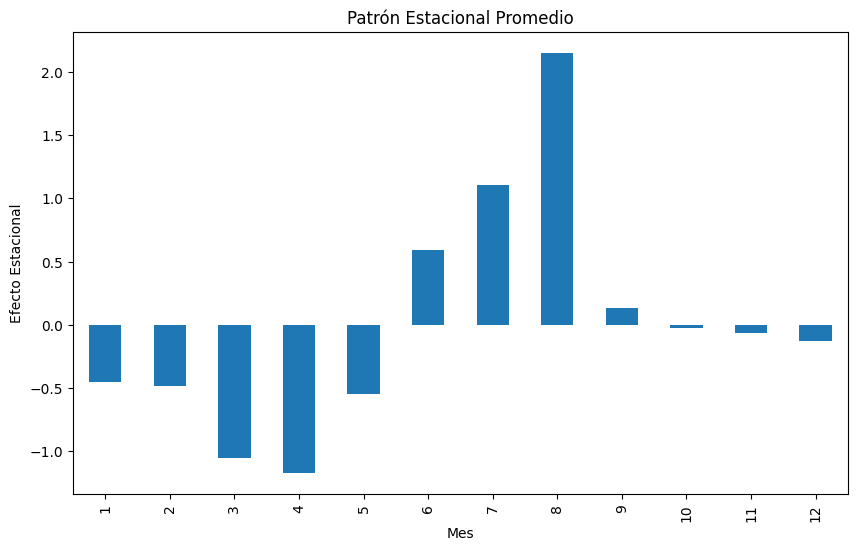

In [13]:

print("Estadísticas  de los componentes:")
print("\nTendencia:")
print(result.trend.describe())
print("\nEstacionalidad:")
print(result.seasonal.describe())
print("\nResiduos:")
print(result.resid.describe())


seasonal_mean = result.seasonal.groupby(result.seasonal.index.month).mean()
plt.figure(figsize=(10, 6))
seasonal_mean.plot(kind='bar')
plt.title('Patrón Estacional Promedio')
plt.xlabel('Mes')
plt.ylabel('Efecto Estacional')
plt.show()

## Estimación a criterio

Un informe de McKinsey & Company de enero de 2024 sugiere:

El mercado global de semiconductores podría alcanzar los $1 billón para 2030.
NVIDIA, como líder en chips de IA, está bien posicionada para capturar una parte significativa de este crecimiento.

Fuente: McKinsey & Company - Semiconductor design and manufacturing: Achieving leading-edge capabilities

https://www.mckinsey.com/industries/industrials-and-electronics/our-insights/semiconductor-design-and-manufacturing-achieving-leading-edge-capabilities

## Modelo Seasonal Naive + Drift

Con lo visto con anterioridad en el análisis exploratorio, es posible que el modelo Seasonal Naive sea un lo suficientemente bueno para la serie de tiempo analizada.

El modelo toma el valor estacional indediatamente anterior cómo el siguiente valor.

\begin{gather*}
\hat{y}_{T+h|T}=y_{T+h-m(k+1)}
\end{gather*}

La razón es que es una serie con un componente altamente estacional. También muestra una tendencia, por lo tanto es recomendabe usar un modelo que tóme en consideración la


### Estimación

### Evaluación

## Bibliografía

